In [107]:
import pandas as pd
import nltk
import unicodedata
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def normalize_encoding(string):
    try:
        return unicodedata.normalize("NFC", string)
    except:
        return string

In [71]:
sacra_rada = pd.read_csv("../data/sacra_rada.csv", sep=",")

In [72]:
for col in ["Šéfredaktor", "Zástupce šéfredaktora", "Výkonný redaktor", "Redakční rada"]:
    sacra_rada[col] = sacra_rada[col].apply(normalize_encoding)

In [73]:
sacra_rada

,Unnamed: 0,Šéfredaktor,Zástupce šéfredaktora,Výkonný redaktor,Redakční rada
0,2003_0,Oldřich Vondruška,Jana Petřicová,NaN,Lucie Hrubá; Přemek Baron; Tereza Mynářova...
1,2003_1,Oldřich Vondruška,Jana Petřicová,NaN,Lucie Hrubá; Přemek Baron; Tereza Mynářova...
2,2004_1,Oldřich Vondruška,Jana Petřicová,NaN,Lucie Hrubá; Pavel Tesař; Přemysl Baroň; Lu...
3,2004_2,Oldřich Vondruška,Jana Petřicová,NaN,Lucie Hrubá; Pavel Tesař; Přemysl Baroň; Lu...
4,2005_1,Luděk Žatečka,Kateřina Kutrová,NaN,Jakub Havlíček; Kristýna Brožková; Markéta Růž...
5,2005_2,Luděk Žatečka,Kateřina Kutrová,NaN,Jakub Havlíček; Kristýna Brožková; Markéta Růž...
6,2006_1,Luděk Žatečka,Kateřina Kutrová,NaN,Jakub Havlíček; Kristýna Brožková; Markéta Růž...
7,2006_2,Aleš Chalupa,NaN,NaN,Jakub Havlíček; Kristýna Brožková; Markéta Růž...
8,2007_1,Aleš Chalupa,NaN,NaN,Jakub Havlíček; Kristýna Brožková; Markéta Růž...
9,2007_2,Aleš Chalupa,NaN,NaN,Jakub Havlíček; Kristýna Brožková; Eva Klocová...


In [74]:
def extract_last_names(row):
    last_names_list = []
    for col in ["Šéfredaktor", "Zástupce šéfredaktora", "Výkonný redaktor", "Redakční rada"]:
        try:
            last_names_list.extend([name.split()[-1] for name in row[col].split(";")])
        except:
            pass
    last_names = list(set(last_names_list))
    return last_names

In [75]:
sacra_rada["clenove"] = sacra_rada.apply(lambda row: extract_last_names(row), axis=1)

In [79]:
names_unification = {"Blaško" : "Blaško",
                     "Brožková" : "Brožková",
                     "Hrubá" : "Hrubá",
                     "Klesnilová" : "Klesnilová",
                     "Klocová" : "Klocová",
                     "Petřicová" : "Petřicová",
                     "Trávníček" : "Trávníček",
                     "Zdražilová" : "Zdražilová",
                     "Šťastná" : "Šťastná",
                     "Baron" : "Baroň"}
def names_cleaning(names_list):
    clean_unified = []
    for name in names_list:
        if name in names_unification.keys():
            clean_unified.append(names_unification[name])
        else:
            clean_unified.append(name)
    return clean_unified
sacra_rada["clenove"] = sacra_rada["clenove"].apply(names_cleaning)


In [104]:
n0 = ['Vondruška', 'Petřicová', 'Baroň', 'Hrubá', 'Tesař', 'Mynářová']
n1 = ['Žatečka', 'Baroň', 'Vondruška', 'Kutrová', 'Brožková', 'Petřicová', 'Růžičková', 'Hrubá', 'Kozderková', 'Tesař']

In [105]:
set(n0) & set(n1)

{'Baroň', 'Hrubá', 'Petřicová', 'Tesař', 'Vondruška'}

In [112]:
remains = [np.nan]
for n in range(len(sacra_rada))[:-1]:
    n0 = sacra_rada.iloc[n]["clenove"]
    n1 = sacra_rada.iloc[n+1]["clenove"]
    remains.append(len(set(n0) & set(n1)) / len(n1) * 100)

In [113]:
sacra_rada["remains"] = remains

In [80]:
sorted(list(set([n for l in sacra_rada["clenove"] for n in l])))

['Baroň',
 'Blaško',
 'Brichová',
 'Brožková',
 'Březinová',
 'Chalupa',
 'Čejková',
 'Erftemeijer',
 'Hampejs',
 'Havelka',
 'Havlíček',
 'Hlaváčová',
 'Hrubá',
 'Janků',
 'Kaše',
 'Ketman',
 'Klesnilová',
 'Klocová',
 'Korbašová',
 'Kozderková',
 'Krpeš',
 'Král',
 'Kundt',
 'Kutrová',
 'Kvíčalová',
 'Lang',
 'Martínková',
 'Marša',
 'Masláková',
 'Menšíková',
 'Mokrý',
 'Mynářová',
 'Nenadalová',
 'Ondrašinová',
 'Petřeková',
 'Petřicová',
 'Puchovský',
 'Rapčanová',
 'Růžičková',
 'Řezníček',
 'Senft',
 'Sojková',
 'Tesař',
 'Trtílek',
 'Trávníček',
 'Vinklát',
 'Vondruška',
 'Vrzal',
 'Válek',
 'Zdražilová',
 'Čejková',
 'Řezníček',
 'Špičáková',
 'Šťastná',
 'Žatečka']

In [82]:
persons_issues_tups = nltk.FreqDist([n for l in sacra_rada["clenove"] for n in l]).most_common()
persons_issues_tups

[('Kaše', 19),
 ('Kvíčalová', 17),
 ('Puchovský', 16),
 ('Čejková', 15),
 ('Vrzal', 15),
 ('Hampejs', 14),
 ('Janků', 14),
 ('Kozderková', 12),
 ('Klocová', 12),
 ('Marša', 12),
 ('Brožková', 11),
 ('Šťastná', 11),
 ('Menšíková', 11),
 ('Kundt', 10),
 ('Masláková', 10),
 ('Petřicová', 9),
 ('Ondrašinová', 9),
 ('Vinklát', 9),
 ('Lang', 9),
 ('Mokrý', 9),
 ('Blaško', 8),
 ('Senft', 8),
 ('Řezníček', 8),
 ('Hrubá', 7),
 ('Kutrová', 7),
 ('Růžičková', 7),
 ('Havelka', 7),
 ('Trávníček', 7),
 ('Martínková', 7),
 ('Brichová', 7),
 ('Rapčanová', 7),
 ('Král', 7),
 ('Havlíček', 6),
 ('Březinová', 6),
 ('Sojková', 6),
 ('Čejková', 6),
 ('Nenadalová', 6),
 ('Petřeková', 6),
 ('Trtílek', 6),
 ('Žatečka', 5),
 ('Klesnilová', 5),
 ('Ketman', 5),
 ('Válek', 5),
 ('Vondruška', 4),
 ('Baroň', 4),
 ('Tesař', 4),
 ('Chalupa', 4),
 ('Krpeš', 4),
 ('Řezníček', 4),
 ('Erftemeijer', 3),
 ('Zdražilová', 3),
 ('Korbašová', 3),
 ('Špičáková', 3),
 ('Mynářová', 2),
 ('Hlaváčová', 2)]

In [177]:
len(persons_issues_tups)

55

In [ ]:
persons_issues_tups

In [84]:
roky_v_rade = [int(tup[1] / 2) for tup in persons_issues_tups]
roky_v_rade

[9,
 8,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1]

In [183]:
(np.array(roky_v_rade) <= 3).sum()

32

In [184]:
(np.array(roky_v_rade) > 5).sum()


10

In [120]:
sacra_rada["Unnamed: 0"].apply(lambda x: x.replace("_", "/"))

0     2003/0
1     2003/1
2     2004/1
3     2004/2
4     2005/1
5     2005/2
6     2006/1
7     2006/2
8     2007/1
9     2007/2
10    2008/1
11    2008/2
12    2009/1
13    2009/2
14    2010/1
15    2010/2
16    2011/1
17    2011/2
18    2012/1
19    2012/2
20    2013/1
21    2013/2
22    2014/1
23    2014/2
24    2015/1
25    2015/2
26    2016/1
27    2016/2
28    2017/1
29    2017/2
30    2018/1
31    2018/2
32    2019/1
33    2019/2
34    2020/1
35    2020/2
36    2021/1
37    2021/2
Name: Unnamed: 0, dtype: object

In [141]:
[el for el in range(2003, 2022, 2)]

[2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021]

Text(0.5, 0, 'rok')

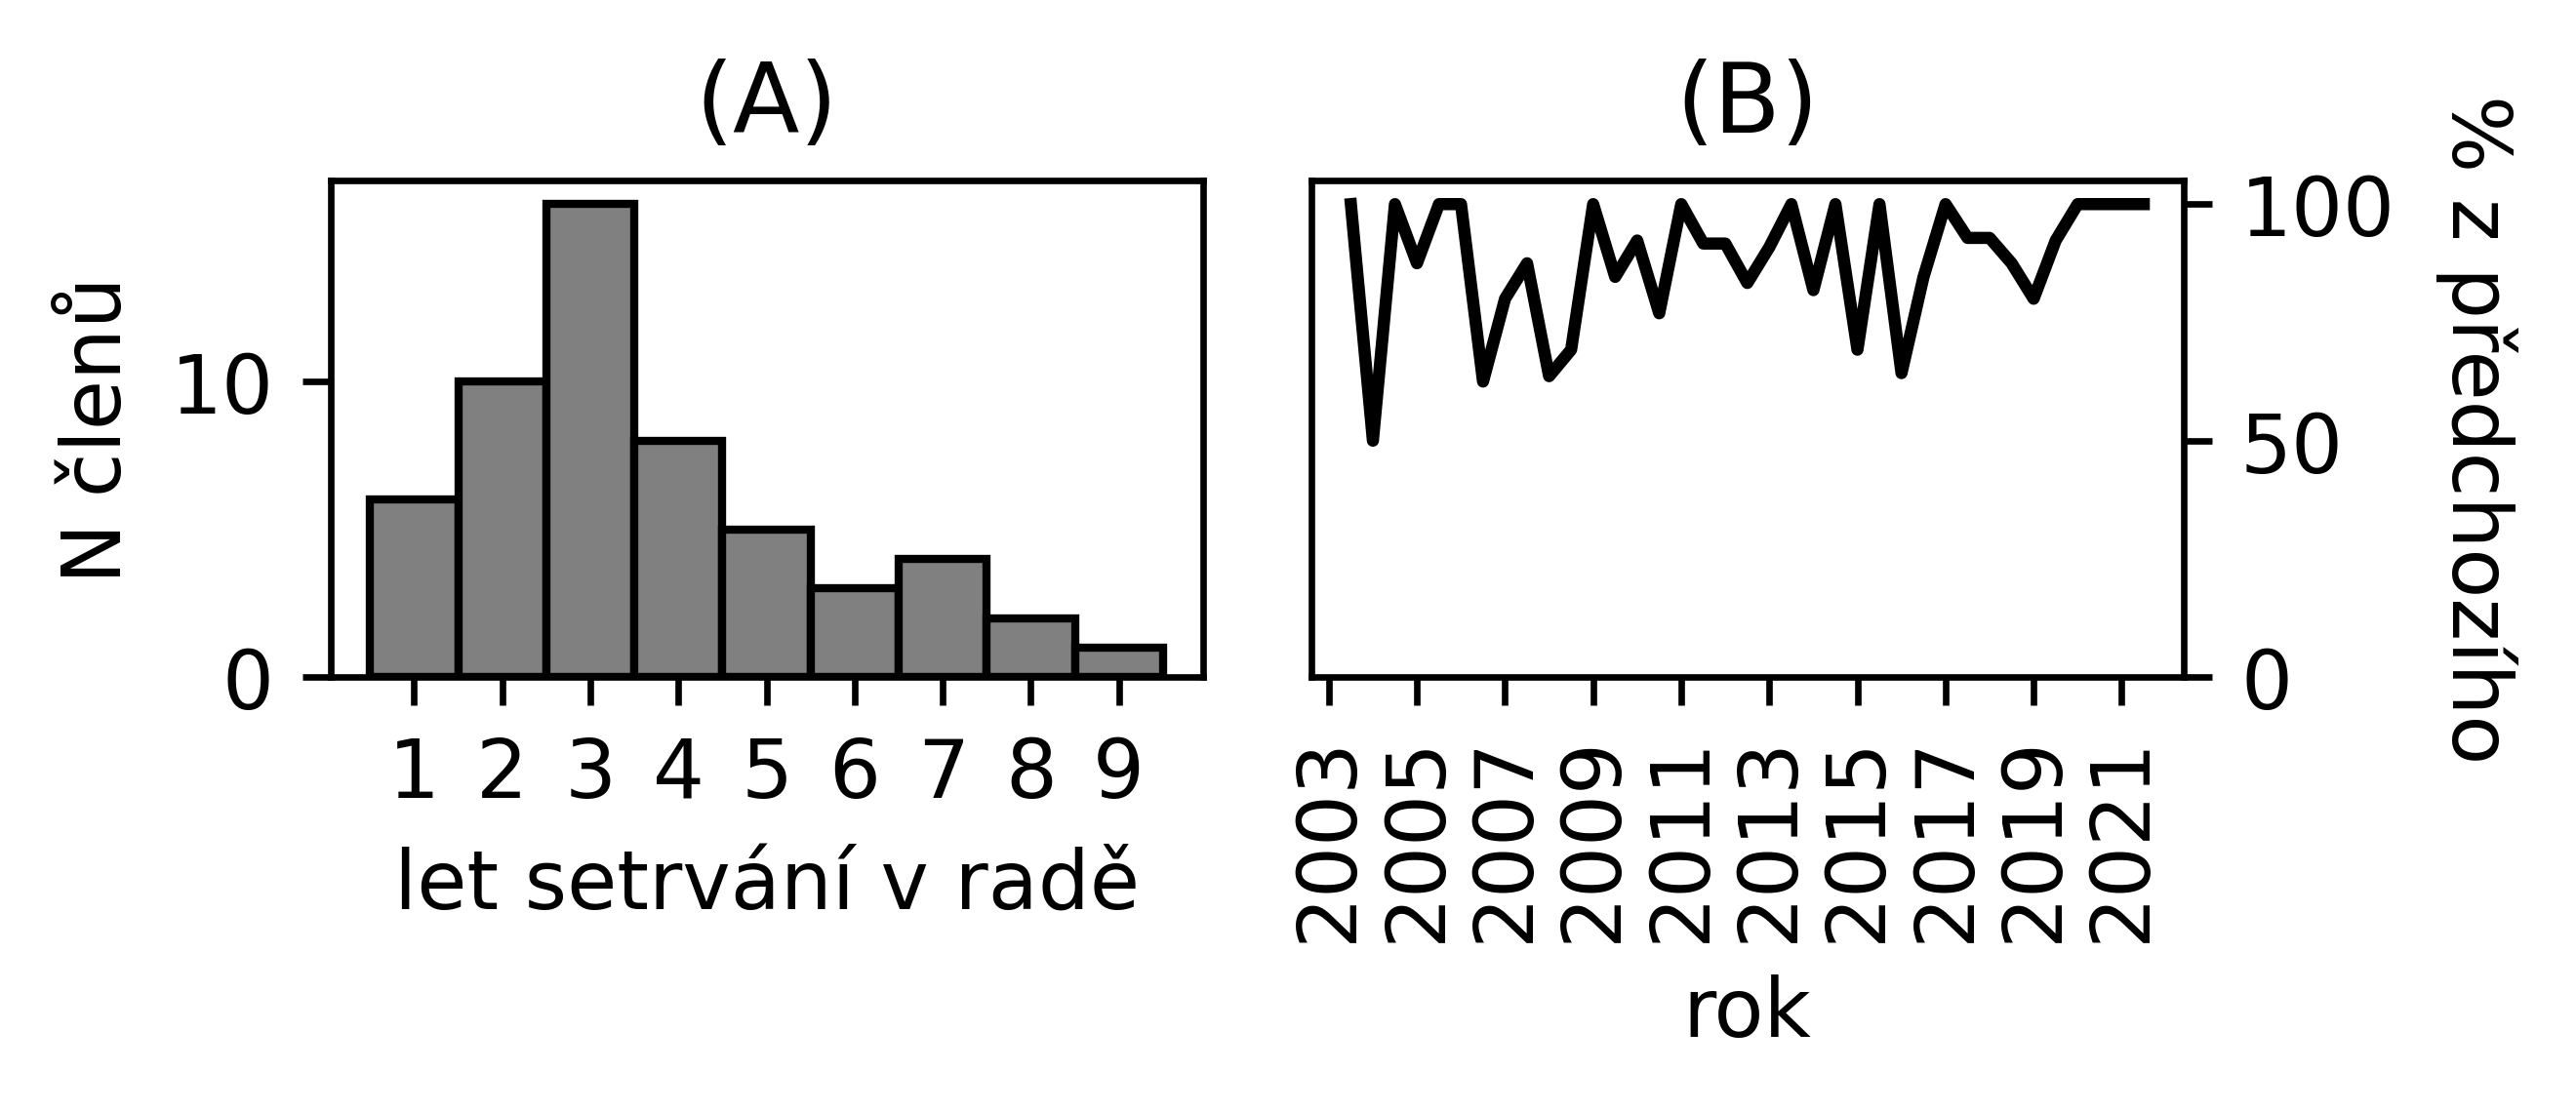

In [175]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(4.5, 2), dpi=600, tight_layout=True)

ax1.set_title("(A)")
ax1.hist(roky_v_rade, bins=[n + 0.5 for n in range(0,10)], edgecolor="black", color="grey")
ax1.set_xticks(range(1,10))
ax1.set_xlabel("let setrvání v radě")
ax1.set_ylabel("N členů")
ax2.set_title("(B)")
ax2.plot(remains, color="black")
ax2.set_xticks(range(0, len(sacra_rada), 4))
ax2.set_xticklabels([str(el) for el in range(2003, 2022, 2)], rotation=90)
ax2.yaxis.tick_right()
ax2.set_ylim(0,105)
ax2.yaxis.set_label_position("right")
ax2.set_ylabel("% z předchozího", rotation=270, labelpad=15)
ax2.set_xlabel("rok")

In [176]:
fig.savefig("../figures/kase_sacra-rada.jpg")